### Description:
    

    * sku – Random ID for the product

    * national_inv – Current inventory level for the part

    * lead_time – Transit time for product (if available)

    * in_transit_qty – Amount of product in transit from source

    * forecast_3_month – Forecast sales for the next 3 months

    * forecast_6_month – Forecast sales for the next 6 months
    
    * forecast_9_month – Forecast sales for the next 9 months

    * sales_1_month – Sales quantity for the prior 1 month time period

    * sales_3_month – Sales quantity for the prior 3 month time period

    * sales_6_month – Sales quantity for the prior 6 month time period

    * sales_9_month – Sales quantity for the prior 9 month time period

    * min_bank – Minimum recommend amount to stock

    * potential_issue – Source issue for part identified

    * pieces_past_due – Parts overdue from source

    * perf_6_month_avg – Source performance for prior 6 month period

    * perf_12_month_avg – Source performance for prior 12 month period

    * local_bo_qty – Amount of stock orders overdue

    * deck_risk – Part risk flag

    * oe_constraint – Part risk flag

    * ppap_risk – Part risk flag

    * stop_auto_buy – Part risk flag

    * rev_stop – Part risk flag

    * went_on_backorder – Product actually went on backorder. This is the target value.


In [ ]:
agglomerative

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns" , 50)

In [2]:
df = pd.read_csv("D:\Capstone Project\Training_Dataset_v2.csv")
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [3]:
print(df.shape)

## we have 1.6 million rows with 23 columns 

(1687861, 23)


In [4]:
df.dtypes

## we have combination of object and float 

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [5]:
df.select_dtypes(object)

## categorical columns = 8 features 

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,No,No,No,No,Yes,No,No
1,1043384,No,No,No,No,Yes,No,No
2,1043696,No,Yes,No,No,Yes,No,No
3,1043852,No,No,No,No,Yes,No,No
4,1044048,No,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...
1687856,1373987,No,No,No,No,Yes,No,No
1687857,1524346,No,Yes,No,No,No,No,Yes
1687858,1439563,No,No,No,No,Yes,No,No
1687859,1502009,No,No,No,No,Yes,No,No


In [6]:
df.select_dtypes(float)

## numerical columns = 15 features 

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0.0,-99.00,-99.00,1.0
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0.0,0.86,0.84,1.0
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0.0,0.86,0.84,6.0
1687859,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,0.0,0.73,0.78,1.0


## Data Pre-Processing

In [8]:
df.describe().T

## The 5 point summary is obtained which inlcudes: min,max,25,50 and 75 percentage

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


### Insights:
* As you can see "perf_6_month_avg" and "perf_12_month_avg" have -99 as a wrong placeholder.
* This could be basically undertood as wrong interpretation. Thus it could be treated as Nan and be removed as well. 

In [7]:
#making it Nan first and then replacing to avoid misinterpretation

df['perf_6_month_avg'].replace(-99,np.NaN, inplace=True)
df['perf_12_month_avg'].replace(-99,np.NaN,inplace=True)

In [8]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg     129479
perf_12_month_avg    122051
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [9]:
# Checking the percentage of missing values

round(100*(df.isnull().sum()/len(df.index)), 2)

sku                  0.00
national_inv         0.00
lead_time            5.98
in_transit_qty       0.00
forecast_3_month     0.00
forecast_6_month     0.00
forecast_9_month     0.00
sales_1_month        0.00
sales_3_month        0.00
sales_6_month        0.00
sales_9_month        0.00
min_bank             0.00
potential_issue      0.00
pieces_past_due      0.00
perf_6_month_avg     7.67
perf_12_month_avg    7.23
local_bo_qty         0.00
deck_risk            0.00
oe_constraint        0.00
ppap_risk            0.00
stop_auto_buy        0.00
rev_stop             0.00
went_on_backorder    0.00
dtype: float64

### Overall Insights on the data 

    * We have 1687861 rows and 23 columns 
    * The data is a mix of "object" and "float"
    * Among these features, we have 8 categorical and 15 numerical features. 
    * We have features such as lead_time, perf_6_month_avg and perf_12_month_avg have 5.98, 7.67 and 7.23 percentage which  contributes to missing values.
    * These missing values can be filled. 
    * The last row of the data consists of Nan, which has to be removed.

## Explaratory Data Analysis 

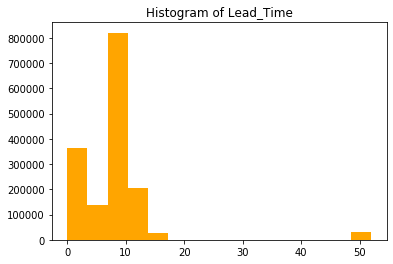

<Figure size 1440x1080 with 0 Axes>

In [10]:
## Lets take a closer look at lead time , perf_6_month_avg , perf_12_month_avg


plt.hist(x = df["lead_time"] , bins = 15,color = "orange")
plt.title('Histogram of Lead_Time')
plt.figure(figsize=(20,15))
plt.show()

## Insights: 

    * The distribution of lead times is right skewed. 
    * Most lead times fall in the range 0-20. 
    * The Samples with missing lead times will be close to the median lead time.

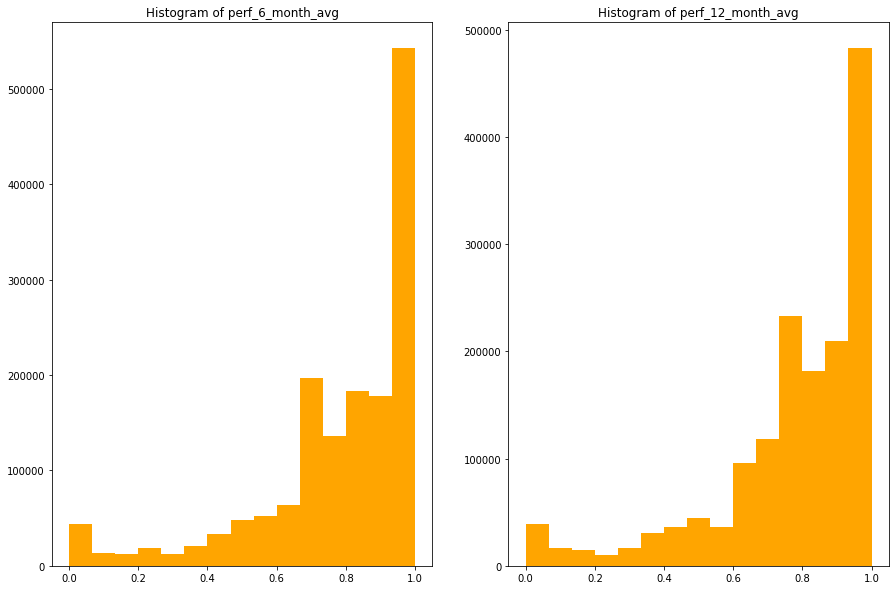

In [11]:
plt.figure(figsize = [15, 10])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.hist(x = df["perf_6_month_avg"], bins = 15 , color = "orange")
plt.title('Histogram of perf_6_month_avg')

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.hist(x = df["perf_12_month_avg"], bins = 15 , color = "orange")
plt.title('Histogram of perf_12_month_avg')

plt.show()

### Insights : 

    * Both the features perf_6_month_avg and perf_12_month_avg distribution's are left skewed. 
    * Both the histograms are similar to each other. 
    * Most values lies in the range of 0.7 - 1 

In [12]:
## Lets fill the nan's for lead_time, perf_6_month_avg and perf_12_month_avg

df["lead_time"] = df["lead_time"].fillna(df["lead_time"].median())
df["perf_6_month_avg"] = df["perf_6_month_avg"].fillna(df["perf_6_month_avg"].median())
df["perf_12_month_avg"] = df["perf_12_month_avg"].fillna(df["perf_12_month_avg"].median())

In [13]:
df.isnull().sum()

sku                  0
national_inv         1
lead_time            0
in_transit_qty       1
forecast_3_month     1
forecast_6_month     1
forecast_9_month     1
sales_1_month        1
sales_3_month        1
sales_6_month        1
sales_9_month        1
min_bank             1
potential_issue      1
pieces_past_due      1
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         1
deck_risk            1
oe_constraint        1
ppap_risk            1
stop_auto_buy        1
rev_stop             1
went_on_backorder    1
dtype: int64

In [14]:
## These 1 in the above features represent to their last row 

df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,0.85,0.83,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
## This last row considered to be invalid and can be removed 

df = df.dropna()

In [16]:
df.tail()

## The Nan's are treated 

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,No,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,0.85,0.83,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


### Converting categorical features to numerical features

In [17]:
df["potential_issue"] = df["potential_issue"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["deck_risk"] = df["deck_risk"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["oe_constraint"] = df["oe_constraint"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["ppap_risk"] = df["ppap_risk"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["stop_auto_buy"] = df["stop_auto_buy"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["rev_stop"] = df["rev_stop"].replace({"Yes" : 1 , "No" : 0}).astype(int)
df["went_on_backorder"] = df["went_on_backorder"].replace({"Yes" : 1 , "No" : 0}).astype(int)

## Data-Visualisation 

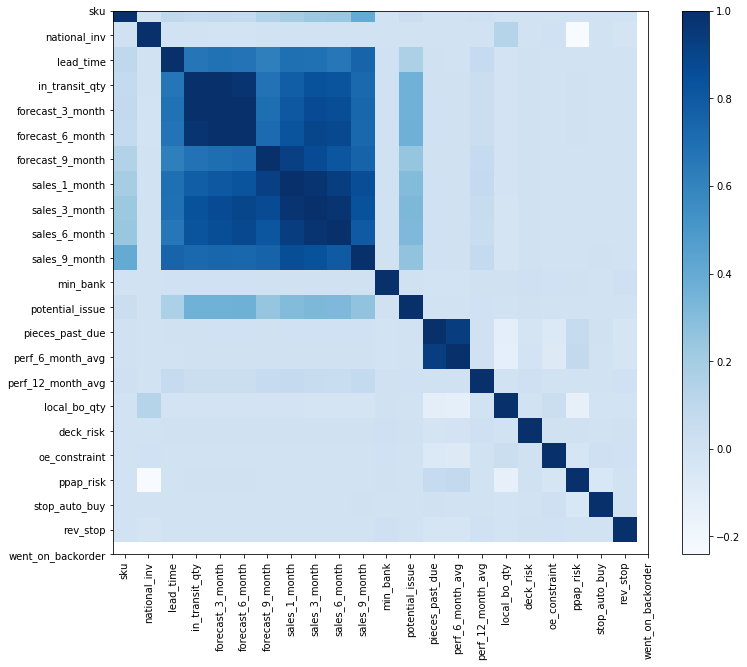

In [18]:
# Look at correlations between features and the label

# Set figure size 
fig = plt.figure(figsize=(12,10)) 

# Plot a correlation matrix
plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest', aspect='auto', alpha = 1)

# Display legend showing what the colours mean
plt.colorbar()

# Add tick marks and feature names for ease of reading
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)

# Show the plot
plt.show()

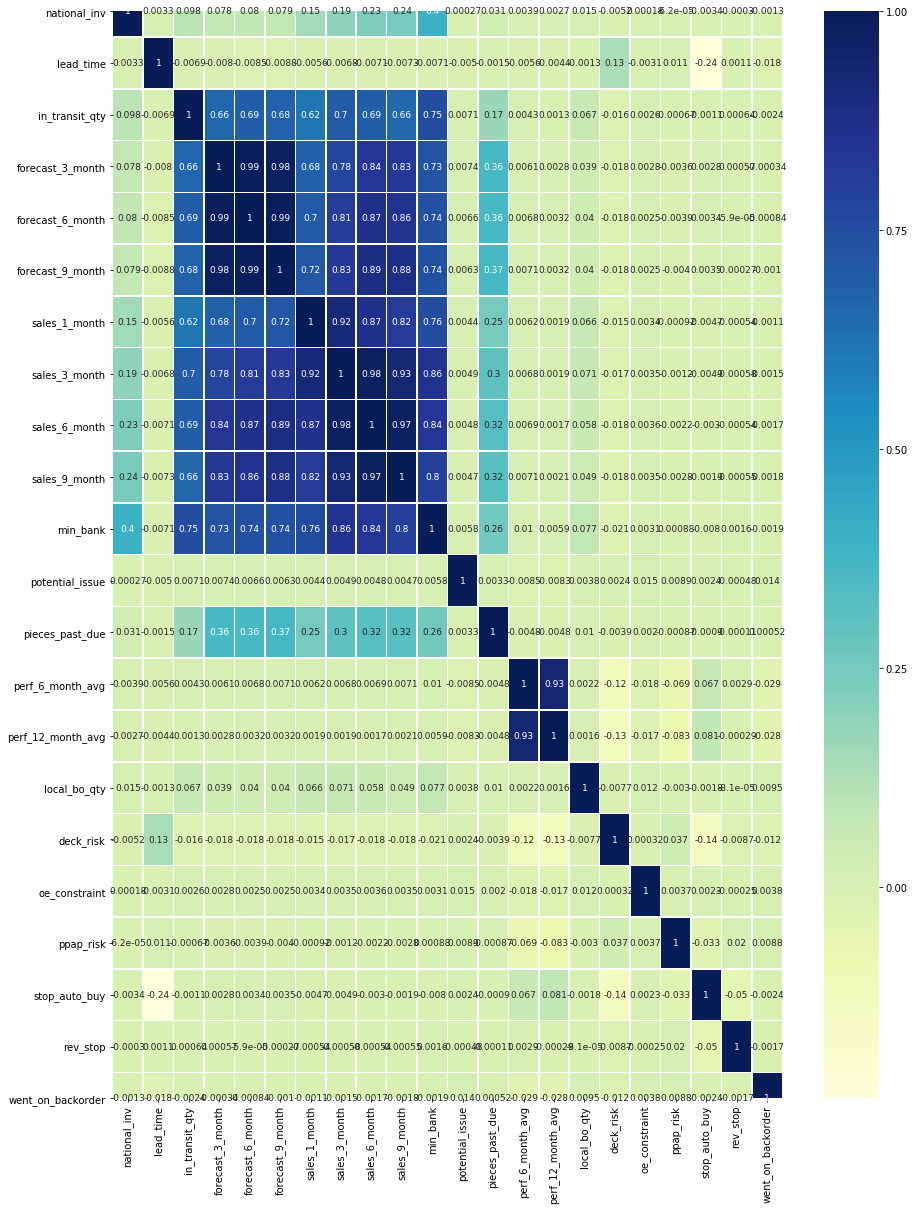

In [19]:
## Setting the size of the heatmap
plt.subplots(figsize = (15 , 20))

## plotting the heatmap
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu" ,linewidths = 0.5, annot_kws={"size": 9})

## Show the plot
plt.show()

### Insights :

    * The correlation matrix shows that the quantity in transit, the forecast sales over 3/6/9 months, the actual sales over the previous 1/3/6/9 months, and minimum recommended stock level are highly correlated. 

    * If the sales are high over the last 1/3/6/9 months, then it is reasonable for the forecast sales over the next 3/6/9 months to also be high. If forecast sales are high, then it would be useful to have more of the stock in hand and to have more shipped in.

    * Besides that, the average performance over the last 6 months strongly correlates with that over the last 12 months.

    * Overall, the correlation matrix suggests that the number of features used for predicting whether an item goes on back order can be lower than the number of features in the dataset. In other words, the dimensionality of the problem may be reduced.

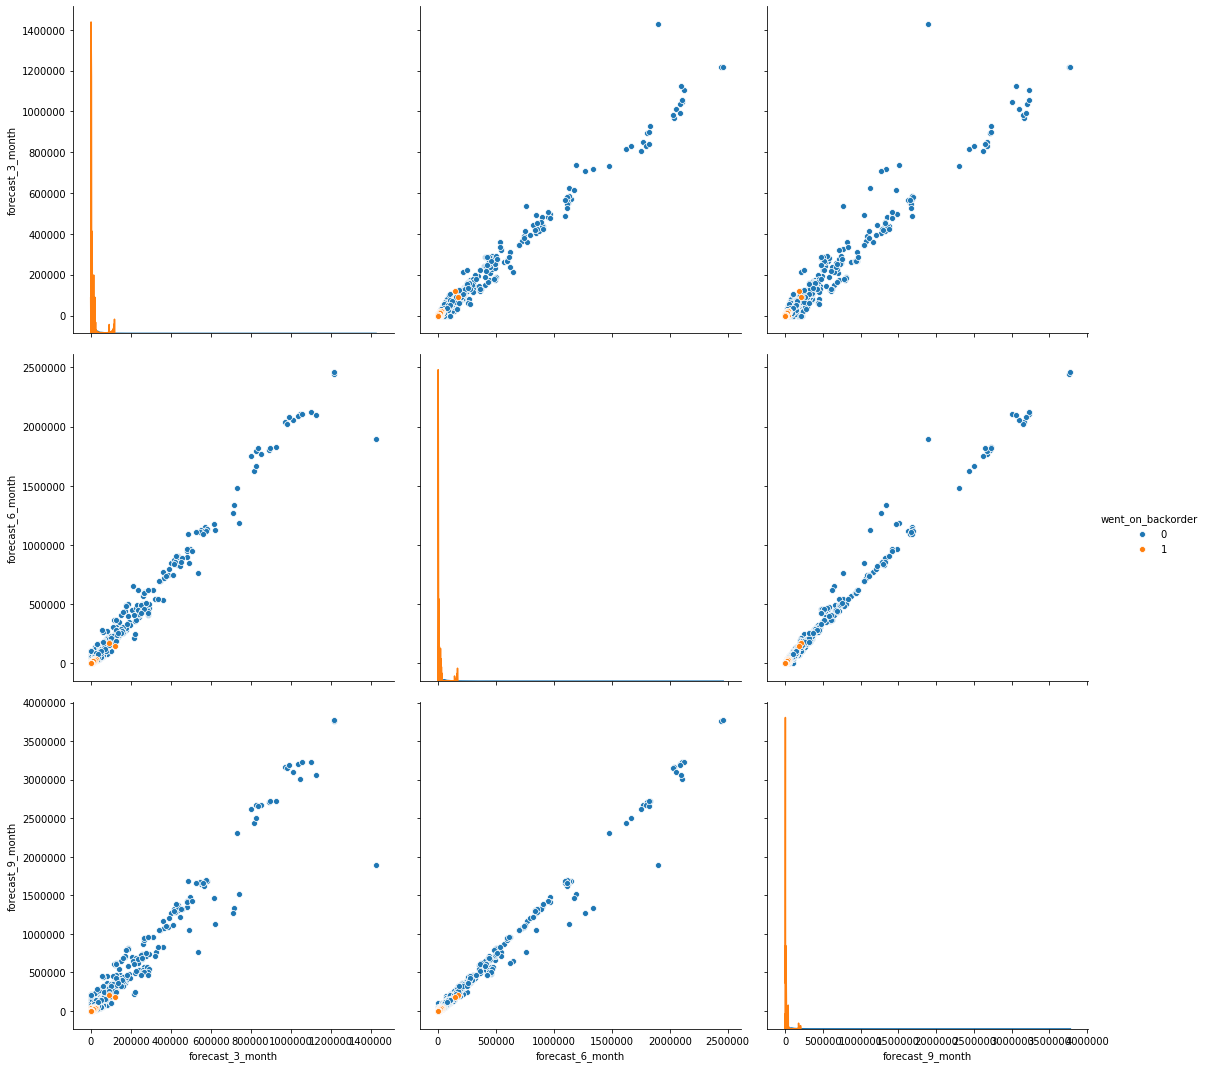

<Figure size 1440x864 with 0 Axes>

In [20]:
## Lets take a closer look on the forescast period.

# Forecast columns
forecasts = ['forecast_3_month','forecast_6_month', 'forecast_9_month']

# Pair-wise scatter plot for the forecasts (3, 6 and 9)
sns.pairplot(df, vars=forecasts, hue='went_on_backorder', size=5)

# Show the plot
fig = plt.figure(figsize = (20 , 12))
plt.show()

## Insights: 

    * The forecast values over each time frame have very close linear correlation with each other, as expected from the 
    correlation matrix. 
    * The forecast values cover a wide range from 0 to over 1 million.
    * Backorders only occur when the forecast value is low.

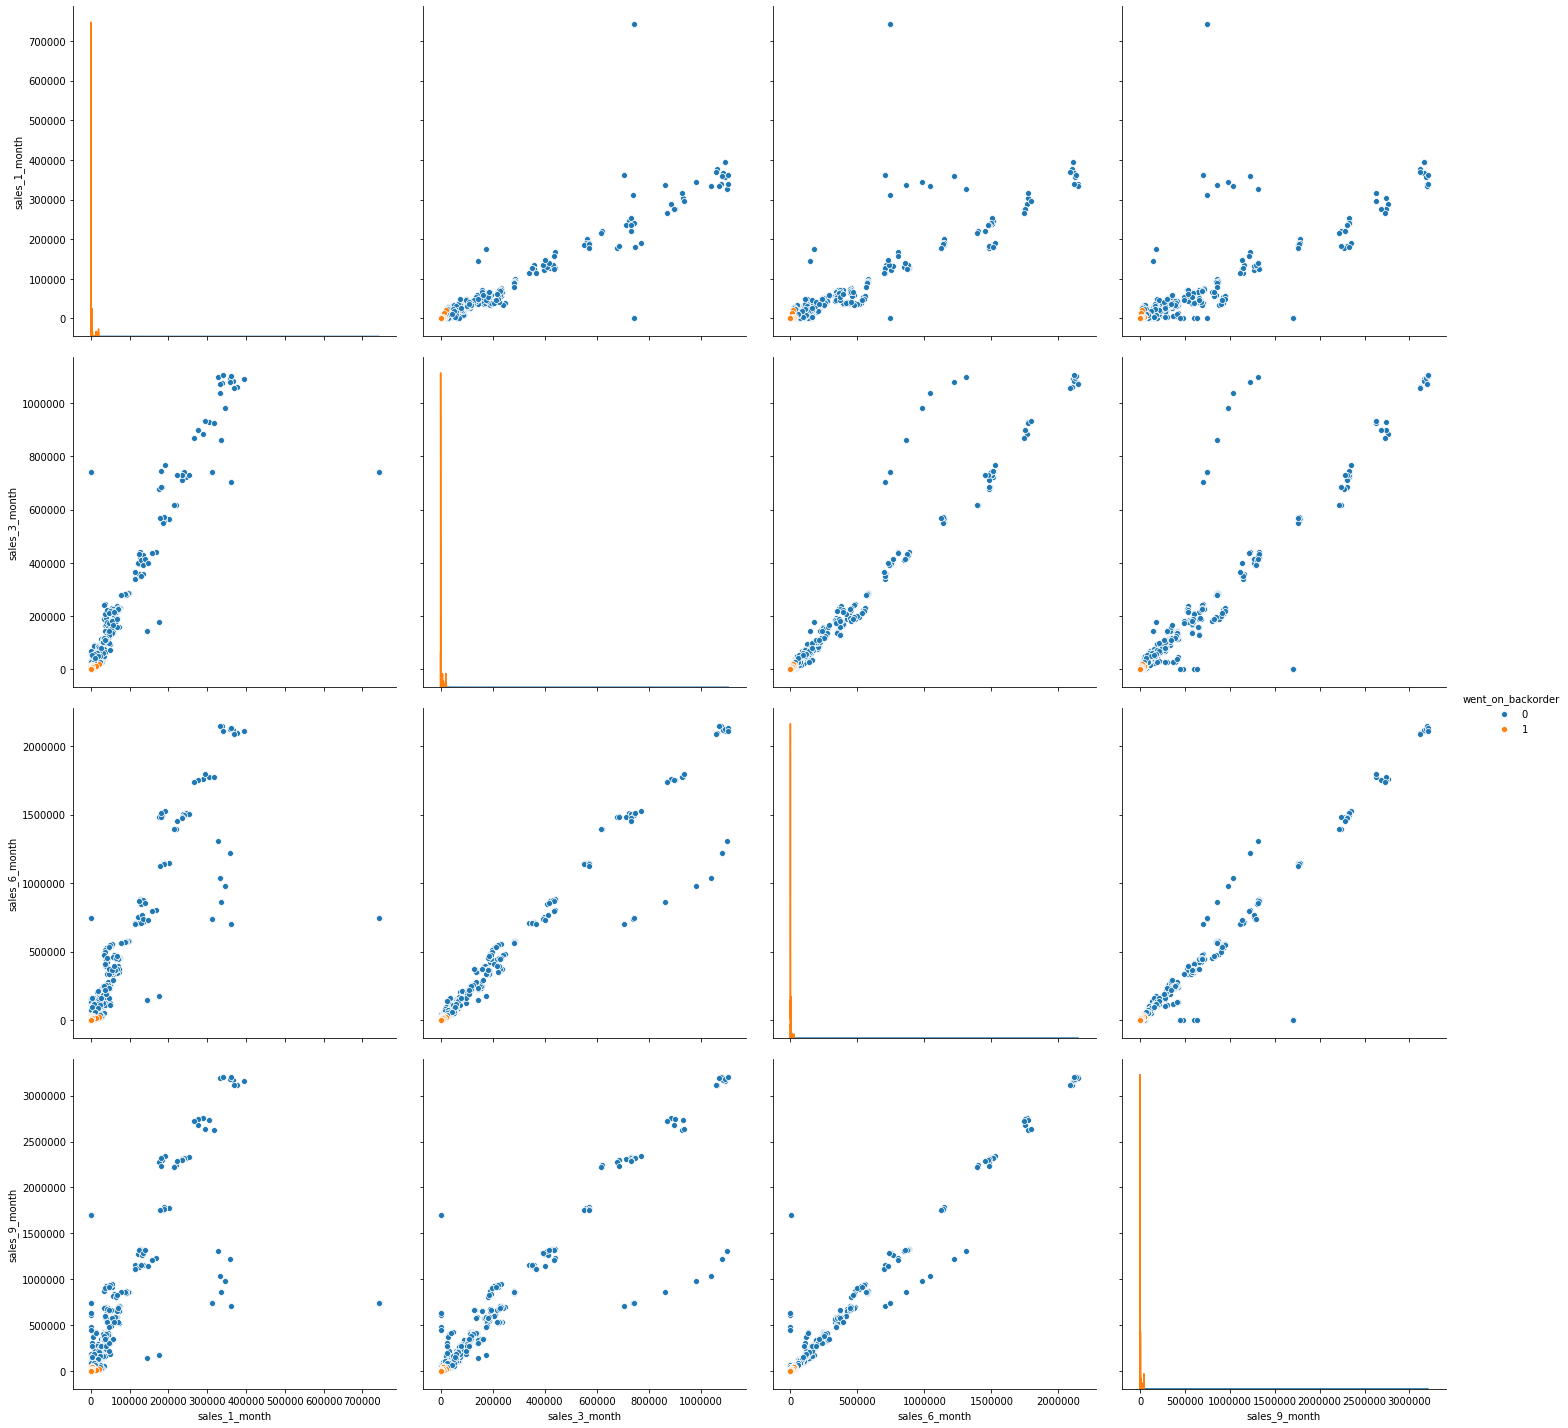

<Figure size 1440x864 with 0 Axes>

In [35]:
# Do a pair-wise scatter plot for sales

## Sales columns 
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']

## Pair-wise scatter plot for the respective sales months 
sns.pairplot(df, vars=sales, hue='went_on_backorder', size=5)

## Plot the figure
fig = plt.figure(figsize = (20 , 12))
plt.show()


## Insights :

    * The sales over each time frame have linear correlations with each other, as expected from the correlation matrix.
    * There are some instances when the sales at different time frames fall away from the linear correlation. 
    * The sales range from 0 to over 1 million. Backorders only occur when sales are low.

### Performing Re-indexing

In [21]:
cols = df.columns.tolist()
cols

['sku',
 'national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'potential_issue',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [22]:
cols.insert(20, cols.pop(cols.index('potential_issue')))  ## 20 is the destination index , potential_issue is ur feature
cols

['sku',
 'national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'potential_issue',
 'rev_stop',
 'went_on_backorder']

In [23]:
df = df.reindex(columns= cols)
df.head()

## Re-indexing is complete 

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,potential_issue,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.83,0.0,0,0,0,1,0,0,0
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0,0,0,0,1,0,0,0
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.83,0.0,1,0,0,1,0,0,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0,0,0,0,1,0,0,0
4,1044048,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.85,0.83,0.0,1,0,0,1,0,0,0


### Check the Outliers 

In [24]:
colors = ["#0101DF", "#DF0101"] ## color combination 

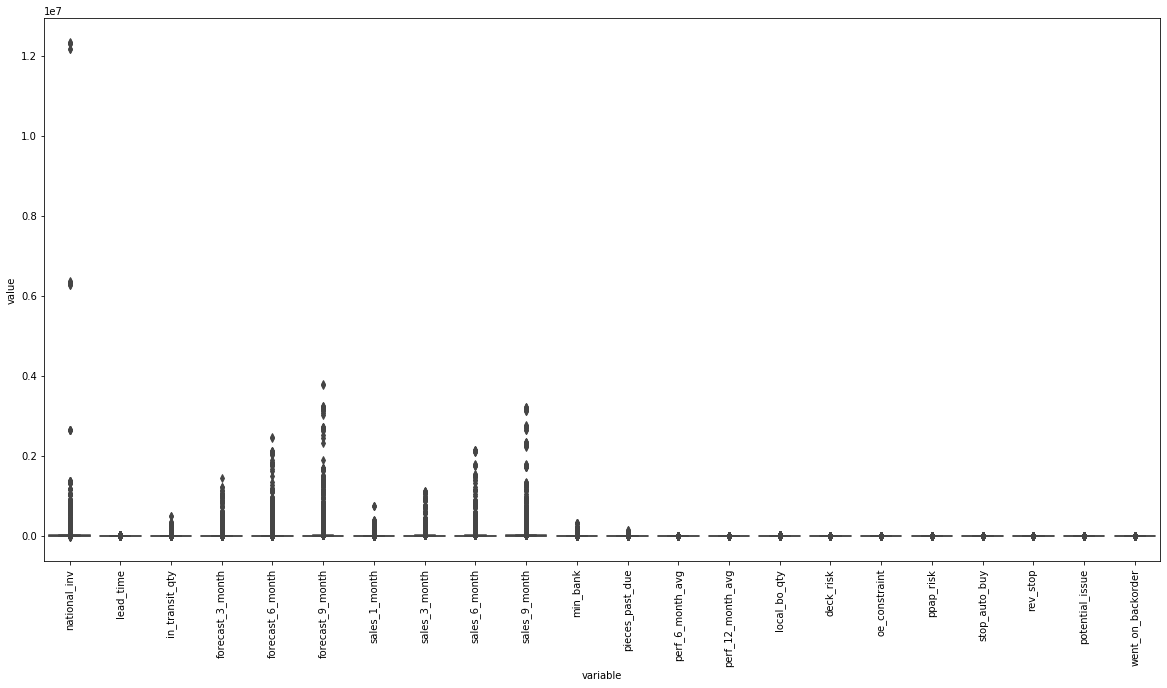

In [41]:
### Creating a Dataframe with all the features in it 

out = pd.DataFrame(data = df , columns = ['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'potential_issue',
 'went_on_backorder'])

## Setting the size of the Box-Plot
fig = plt.figure(figsize = (20 , 10))

## Creating the Box-Plot
sns.boxplot(x="variable", y="value", data=pd.melt(out))

## Rotating the features to 90 Degree
plt.xticks(rotation = 90)

## PLotting
plt.show()

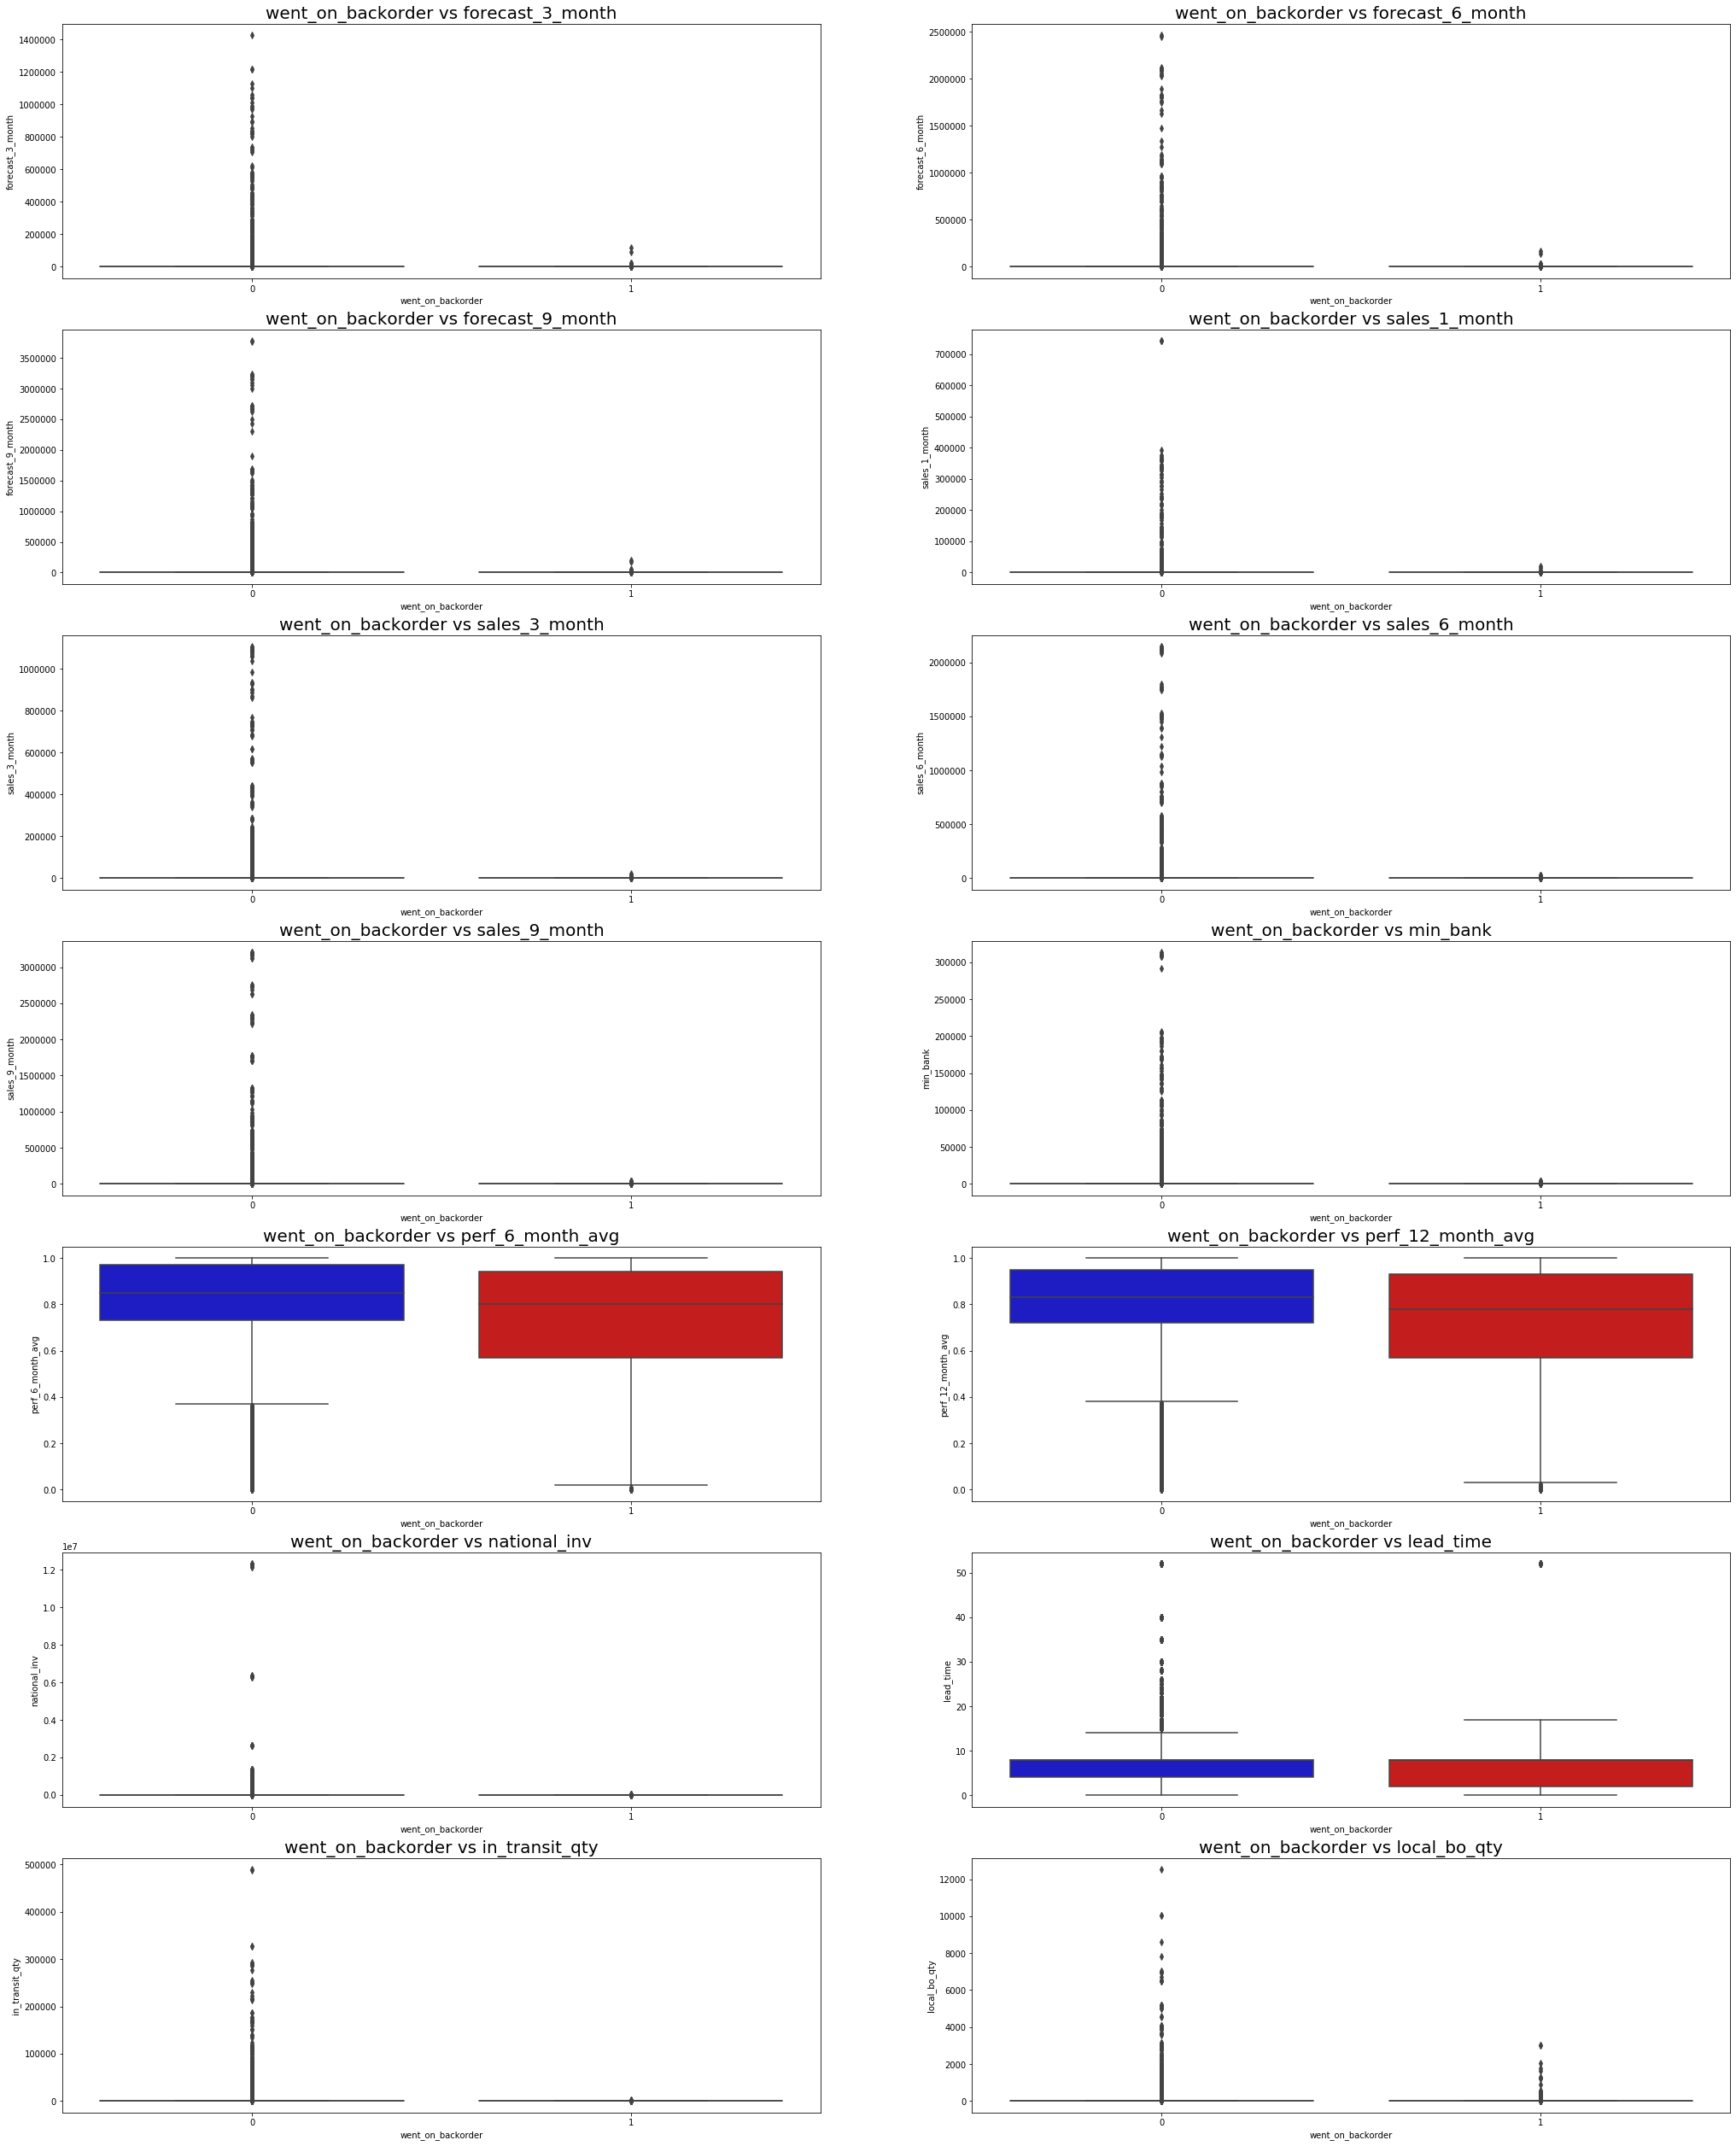

In [25]:
## Allocating the axis and the subplots 

f, axes = plt.subplots(7,2, figsize=(35,45))

## Creating the Boxplot for Every Feature with respect to "Went on Backorder"

sns.boxplot(x="went_on_backorder", y="forecast_3_month", data=df, palette=colors, ax=axes[0,0])
axes[0,0].set_title('went_on_backorder vs forecast_3_month' , fontsize= 20)
axes[0,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[0,0].set_ylabel('forecast_3_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="forecast_6_month", data=df, palette=colors, ax=axes[0,1])
axes[0,1].set_title('went_on_backorder vs forecast_6_month',fontsize= 20)
axes[0,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[0,1].set_ylabel('forecast_6_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="forecast_9_month", data=df, palette=colors, ax=axes[1,0])
axes[1,0].set_title('went_on_backorder vs forecast_9_month',fontsize= 20)
axes[1,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[1,0].set_ylabel('forecast_9_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="sales_1_month", data=df, palette=colors, ax=axes[1,1])
axes[1,1].set_title('went_on_backorder vs sales_1_month',fontsize= 20)
axes[1,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[1,1].set_ylabel('sales_1_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="sales_3_month", data=df, palette=colors, ax=axes[2,0])
axes[2,0].set_title('went_on_backorder vs sales_3_month',fontsize= 20)
axes[2,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[2,0].set_ylabel('sales_3_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="sales_6_month", data=df, palette=colors, ax=axes[2,1])
axes[2,1].set_title('went_on_backorder vs sales_6_month',fontsize= 20)
axes[2,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[2,1].set_ylabel('sales_6_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="sales_9_month", data=df, palette=colors, ax=axes[3,0])
axes[3,0].set_title('went_on_backorder vs sales_9_month',fontsize= 20)
axes[3,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[3,0].set_ylabel('sales_9_month', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="min_bank", data=df, palette=colors, ax=axes[3,1])
axes[3,1].set_title('went_on_backorder vs min_bank',fontsize= 20)
axes[3,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[3,1].set_ylabel('min_bank', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="perf_6_month_avg", data=df, palette=colors, ax=axes[4,0])
axes[4,0].set_title('went_on_backorder vs perf_6_month_avg',fontsize= 20)
axes[4,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[4,0].set_ylabel('perf_6_month_avg', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="perf_12_month_avg", data=df, palette=colors, ax=axes[4,1])
axes[4,1].set_title('went_on_backorder vs perf_12_month_avg',fontsize= 20)
axes[4,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[4,1].set_ylabel('perf_12_month_avg', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="national_inv", data=df, palette=colors, ax=axes[5,0])
axes[5,0].set_title('went_on_backorder vs national_inv',fontsize= 20)
axes[5,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[5,0].set_ylabel('national_inv', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="lead_time", data=df, palette=colors, ax=axes[5,1])
axes[5,1].set_title('went_on_backorder vs lead_time',fontsize= 20)
axes[5,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[5,1].set_ylabel('lead_time', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="in_transit_qty", data=df, palette=colors, ax=axes[6,0])
axes[6,0].set_title('went_on_backorder vs in_transit_qty',fontsize= 20)
axes[6,0].set_xlabel('went_on_backorder',fontsize = 10) 
axes[6,0].set_ylabel('in_transit_qty', fontsize = 10)

sns.boxplot(x="went_on_backorder", y="local_bo_qty", data=df, palette=colors, ax=axes[6,1])
axes[6,1].set_title('went_on_backorder vs local_bo_qty',fontsize= 20)
axes[6,1].set_xlabel('went_on_backorder',fontsize = 10) 
axes[6,1].set_ylabel('local_bo_qty', fontsize = 10)

## PLotting 
plt.show()

## Insights:

    * when it comes to outliers, it plays an important role
    * The only question that ponders every one's mind is "Do we need to treat them or not?"
    * Apparently, the answer to the question depends on the dataset
    * These anamolies/outliers are usefull in this dataset, as it will help us to find out the products back order activity
    * There are plenty of outliers for every features with respect to target (went on backorder)
    * We will not be removing these outliers because each it may result in loss of data 
    * Besides we will using Tree based Algorithms or Ensemble Techniques to predict the backorder
    * The above mentioned algorithms are robust to outliers and skewness.

## Checking the Skewness of the data 

In [49]:
## Before checking the Skewness , we can drop the SKU from our dataset, as it depicts just the random product ID 

df1 = df.copy(deep = True)
df1.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,potential_issue,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.83,0.0,0,0,0,1,0,0,0
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0,0,0,0,1,0,0,0
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.83,0.0,1,0,0,1,0,0,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0,0,0,0,1,0,0,0
4,1044048,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.85,0.83,0.0,1,0,0,1,0,0,0


In [50]:
df1.drop(["sku"],1,inplace=True)

In [51]:
df1.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,potential_issue,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.83,0.0,0,0,0,1,0,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0,0,0,0,1,0,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.83,0.0,1,0,0,1,0,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0,0,0,0,1,0,0,0
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.85,0.83,0.0,1,0,0,1,0,0,0


In [53]:
### Now lets check the skewness of data 

df1.skew()

national_inv         340.285800
lead_time              4.695413
in_transit_qty       166.183404
forecast_3_month     138.968325
forecast_6_month     138.961427
forecast_9_month     143.298875
sales_1_month        196.119990
sales_3_month        141.286380
sales_6_month        139.176712
sales_9_month        135.054191
min_bank             131.212649
pieces_past_due      412.391900
perf_6_month_avg      -1.700319
perf_12_month_avg     -1.720717
local_bo_qty         165.190548
deck_risk              1.286056
oe_constraint         82.983353
ppap_risk              2.327643
stop_auto_buy         -4.966737
potential_issue       43.103712
rev_stop              48.020605
went_on_backorder     12.102385
dtype: float64

### Lets Visualize it 

    Univariative Analysis on the features with Skewness and Kurtosis 

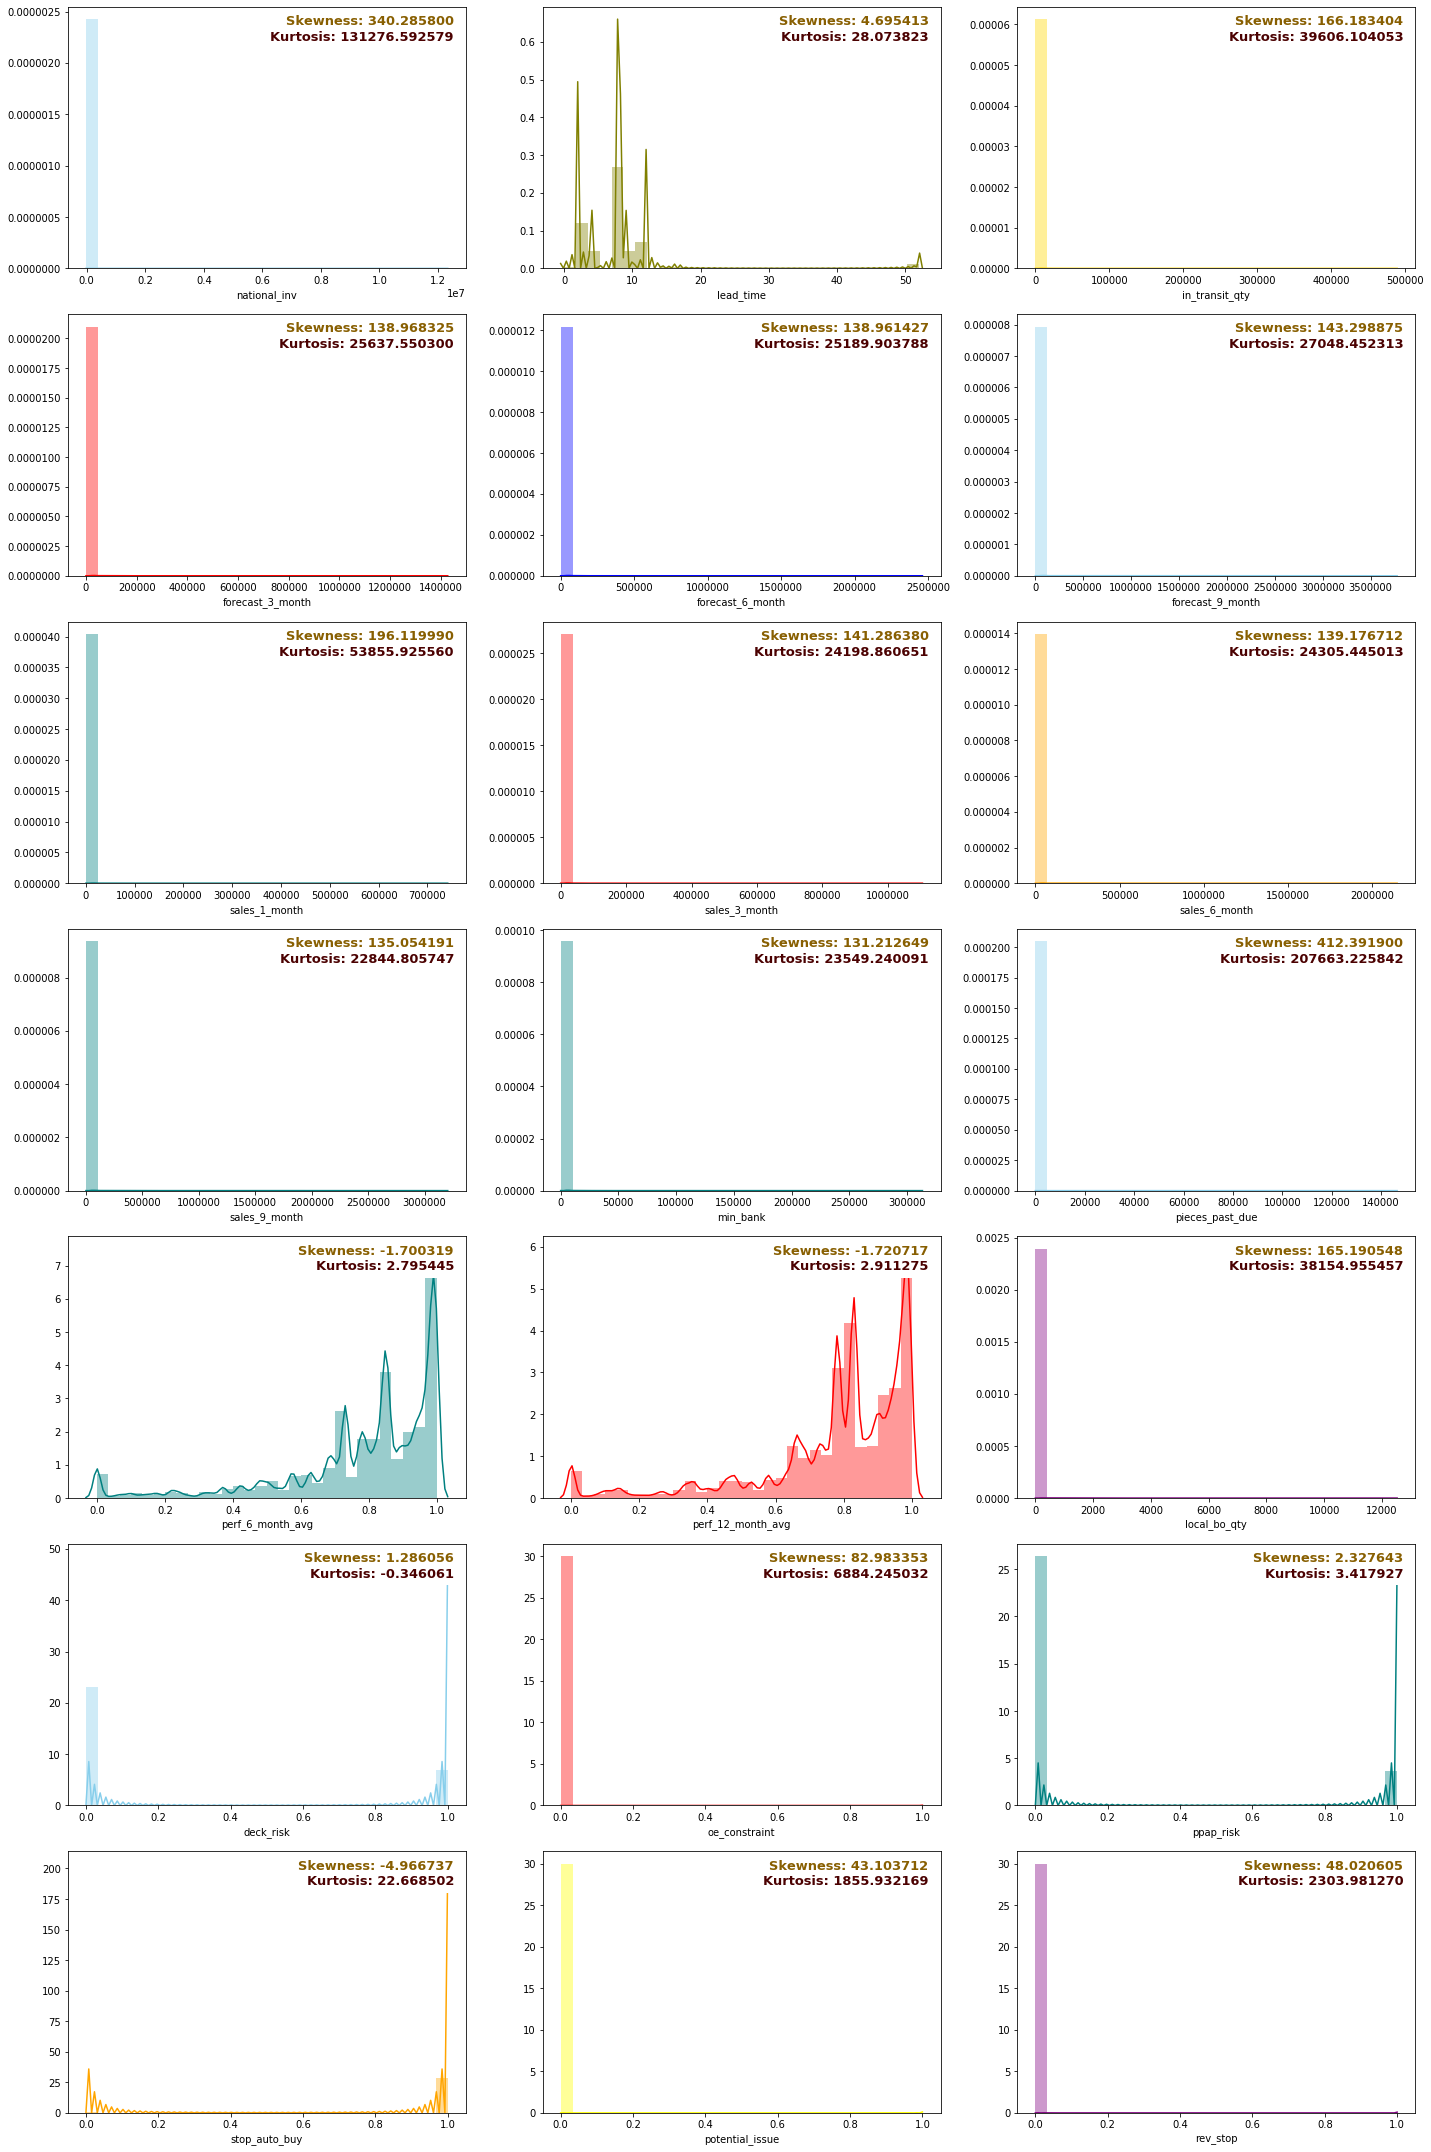

In [56]:
## Allocating the axis
f, axes = plt.subplots(7, 3, figsize=(20, 30))

## Univariate analysis using distplot
sns.distplot(df1.iloc[:,0], color="skyblue",bins = 30, ax=axes[0,0])
sns.distplot(df1.iloc[:,1], color="olive",bins = 30, ax=axes[0,1])
sns.distplot(df1.iloc[:,2], color="gold",bins = 30, ax=axes[0,2])
sns.distplot(df1.iloc[:,3], color="red",bins = 30, ax=axes[1,0])
sns.distplot(df1.iloc[:,4], color="blue",bins = 30, ax=axes[1,1])
sns.distplot(df1.iloc[:,5], color="skyblue",bins = 30, ax=axes[1,2])
sns.distplot(df1.iloc[:,6], color="teal",bins = 30, ax=axes[2,0])
sns.distplot(df1.iloc[:,7], color="red",bins = 30, ax=axes[2,1])
sns.distplot(df1.iloc[:,8], color="orange",bins = 30, ax=axes[2,2])
sns.distplot(df1.iloc[:,9], color="teal", bins = 30,ax=axes[3,0])
sns.distplot(df1.iloc[:,10], color="teal", bins = 30,ax=axes[3,1])
sns.distplot(df1.iloc[:,11], color="skyblue", bins = 30,ax=axes[3,2])
sns.distplot(df1.iloc[:,12], color="teal", bins = 30,ax=axes[4,0])
sns.distplot(df1.iloc[:,13], color="red", bins = 30,ax=axes[4,1])
sns.distplot(df1.iloc[:,14], color="purple",bins = 30, ax=axes[4,2])
sns.distplot(df1.iloc[:,15], color="skyblue",bins = 30, ax=axes[5,0])
sns.distplot(df1.iloc[:,16], color="red",bins = 30, ax=axes[5,1])
sns.distplot(df1.iloc[:,17], color="teal", bins = 30,ax=axes[5,2])
sns.distplot(df1.iloc[:,18], color="orange",bins = 30, ax=axes[6,0])
sns.distplot(df1.iloc[:,19], color="yellow", bins = 30,ax=axes[6,1])
sns.distplot(df1.iloc[:,20], color="purple", bins = 30,ax=axes[6,2])

## calculating the Skewness and Kurtosis for the features 
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df1.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=13, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df1.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=13, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood') 
    
## Plotting    
plt.tight_layout()

## Insights: 

    * The above graphical methods include the histogram and normality plot.
    * Skewness and Kurtosis are used to test the normality of a given dataset.
    * Apparently, skewness is not close to zero, then the dataset is not normally distributed.

## Checking the Imbalance of the Dataset 

In [57]:
df1.head(3)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,potential_issue,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.83,0.0,0,0,0,1,0,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0,0,0,0,1,0,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.83,0.0,1,0,0,1,0,0,0


## Segregate the converted features (categorical to numerical)

In [58]:
cat_col = df1.loc[:,"deck_risk":"went_on_backorder"]
print(cat_col.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 7 columns):
deck_risk            1687860 non-null int32
oe_constraint        1687860 non-null int32
ppap_risk            1687860 non-null int32
stop_auto_buy        1687860 non-null int32
potential_issue      1687860 non-null int32
rev_stop             1687860 non-null int32
went_on_backorder    1687860 non-null int32
dtypes: int32(7)
memory usage: 57.9 MB
None


## Segregate the numerical feature 

In [59]:
num_col = df1.loc[: , 'national_inv' : 'local_bo_qty']
print(num_col.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 15 columns):
national_inv         1687860 non-null float64
lead_time            1687860 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
dtypes: float64(15)
memory usage: 206.0 MB
None


## Checking the proportions in "cat_col" variable

In [60]:
for i in cat_col:
    count = cat_col[i].value_counts(normalize = True)
    print(i)
    print(count*100)

deck_risk
0    77.042942
1    22.957058
Name: deck_risk, dtype: float64
oe_constraint
0    99.985485
1     0.014515
Name: oe_constraint, dtype: float64
ppap_risk
0    87.923524
1    12.076476
Name: ppap_risk, dtype: float64
stop_auto_buy
1    96.380861
0     3.619139
Name: stop_auto_buy, dtype: float64
potential_issue
0    99.946263
1     0.053737
Name: potential_issue, dtype: float64
rev_stop
0    99.956691
1     0.043309
Name: rev_stop, dtype: float64
went_on_backorder
0    99.330928
1     0.669072
Name: went_on_backorder, dtype: float64


### Let's Visulaize it with respect to "went_on_backorder"

    1 - Back order 
    0 - Not Back order 

The feature is : deck_risk
Cross Tab for deck_risk and went on back order
went_on_backorder          0         1
deck_risk                             
0                  76.487386  0.555556
1                  22.843542  0.113517
AxesSubplot(0.125,0.125;0.775x0.755)


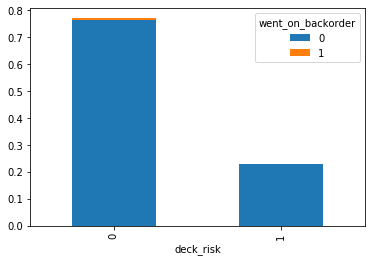

The feature is : oe_constraint
Cross Tab for oe_constraint and went on back order
went_on_backorder          0         1
oe_constraint                         
0                  99.316886  0.668598
1                   0.014041  0.000474
AxesSubplot(0.125,0.125;0.775x0.755)


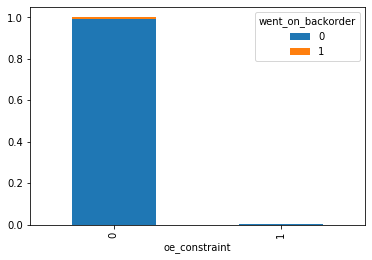

The feature is : ppap_risk
Cross Tab for ppap_risk and went on back order
went_on_backorder          0         1
ppap_risk                             
0                  87.358667  0.564857
1                  11.972261  0.104215
AxesSubplot(0.125,0.125;0.775x0.755)


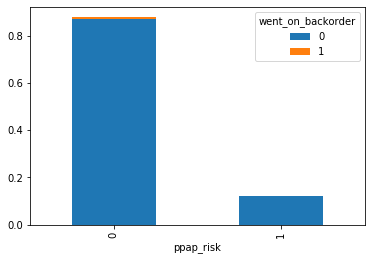

The feature is : stop_auto_buy
Cross Tab for stop_auto_buy and went on back order
went_on_backorder          0         1
stop_auto_buy                         
0                   3.591234  0.027905
1                  95.739694  0.641167
AxesSubplot(0.125,0.125;0.775x0.755)


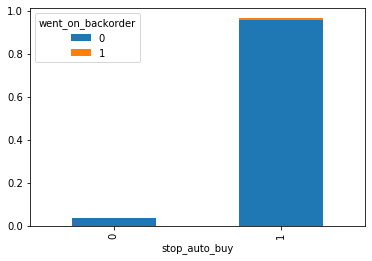

The feature is : potential_issue
Cross Tab for potential_issue and went on back order
went_on_backorder          0         1
potential_issue                       
0                  99.280213  0.666051
1                   0.050715  0.003022
AxesSubplot(0.125,0.125;0.775x0.755)


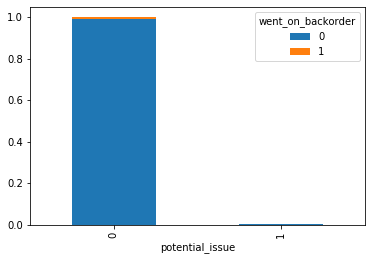

The feature is : rev_stop
Cross Tab for rev_stop and went on back order
went_on_backorder          0         1
rev_stop                              
0                  99.287619  0.669072
1                   0.043309  0.000000
AxesSubplot(0.125,0.125;0.775x0.755)


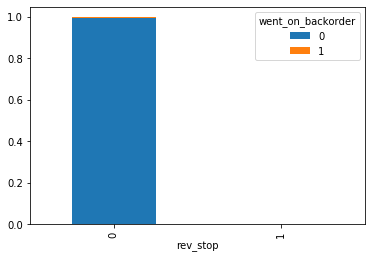

The feature is : went_on_backorder
Cross Tab for went_on_backorder and went on back order
went_on_backorder          0         1
went_on_backorder                     
0                  99.330928  0.000000
1                   0.000000  0.669072
AxesSubplot(0.125,0.125;0.775x0.755)


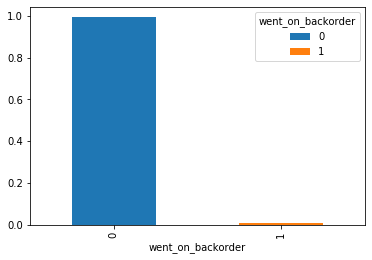

In [62]:
for i in cat_col:
    cross_tab = pd.crosstab(df[i], df['went_on_backorder'] , normalize = True)
    plotting = pd.crosstab(df[i], df['went_on_backorder'] , normalize = True ).plot.bar(stacked = True)
    print("The feature is :" , i)    
    print("Cross Tab for", i , "and went on back order")
    print(cross_tab*100)
    print(plotting)
    plt.show()

### Insights: 

    * As we can from the plots, there's a very few number of products that actually went to back order. 
    * This implies the data is extremely imbalanced
    * Using this imbalanced data, if we are to predict the backorder activity, the model will overfit
    * Hence it is recommended that the data has to be balanced before building the model.